In [70]:
!pip install -r requirements.txt

     |████████████████████████████████| 92 kB 1.8 MB/s eta 0:00:011


In [16]:
import sklearn
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [17]:
df= pd.read_csv('clean_data/clean_SSA_2016_2020_School.csv')
df.head()

,Unnamed: 0,School Campus,Intervention Type,Scanning Type,School Related,School Hours,Enforcment By,Restraints,Force,Top Charge,SummonsCharge,Classification,Incident Location,Scanning Incident,Greater Than 21,Type Of Force,Year
0,0,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,CRIM POS WEAPON,NaN,M,On-Site,Y,NaN,NaN,2016
1,1,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,ASSAULT,NaN,F,On-Site,N,NaN,NaN,2016
2,2,Abraham Lincoln HS(BS),Arrested,Full-Time,N,Y,PATROL,Yes,N,CPSP,NaN,M,Off-Site,N,NaN,NaN,2016
3,3,Abraham Lincoln HS(BS),Child in Crisis,Full-Time,Y,Y,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
4,4,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,AGG HARASS,NaN,M,On-Site,N,NaN,NaN,2016


In [18]:
del df['Unnamed: 0']


In [19]:
df.head()

,School Campus,Intervention Type,Scanning Type,School Related,School Hours,Enforcment By,Restraints,Force,Top Charge,SummonsCharge,Classification,Incident Location,Scanning Incident,Greater Than 21,Type Of Force,Year
0,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,CRIM POS WEAPON,NaN,M,On-Site,Y,NaN,NaN,2016
1,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,ASSAULT,NaN,F,On-Site,N,NaN,NaN,2016
2,Abraham Lincoln HS(BS),Arrested,Full-Time,N,Y,PATROL,Yes,N,CPSP,NaN,M,Off-Site,N,NaN,NaN,2016
3,Abraham Lincoln HS(BS),Child in Crisis,Full-Time,Y,Y,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
4,Abraham Lincoln HS(BS),Arrested,Full-Time,Y,Y,PATROL,Yes,N,AGG HARASS,NaN,M,On-Site,N,NaN,NaN,2016


In [20]:
df.nunique()

School Campus        1874
Intervention Type       8
Scanning Type           5
School Related          2
School Hours            2
Enforcment By           9
Restraints              4
Force                   3
Top Charge            118
SummonsCharge          32
Classification          5
Incident Location       2
Scanning Incident       2
Greater Than 21         2
Type Of Force           3
Year                    5
dtype: int64

In [21]:
df['Intervention Type'] = df['Intervention Type'].str.title()

In [22]:
df['Intervention Type'].value_counts()

Mitigated          17827
Child In Crisis    12265
Juvenile Report     4985
Arrested            4554
Summons             2895
Pins / Warrant       162
Pins Warrant          19
Name: Intervention Type, dtype: int64

In [23]:
df['Top Charge'].value_counts()

ASSAULT                        1720
ROBBERY                         611
GRAND LARCENY                   239
FORCIBLE TOUCH                  151
CPCS                            147
                               ... 
BAIL JUMPING                      1
FAIL ANSWER TICKET                1
INCITE RIOT                       1
RECKLESS ENDANGERMENT             1
CRIMINAL POSSESSION WEAPON        1
Name: Top Charge, Length: 118, dtype: int64

In [24]:
df['Enforcment By'].value_counts()

DOE         17187
PATROL       7410
SSA          4773
UTF          1293
DB            940
TRANSIT        46
NON NYPD       24
HOUSING        16
OCCB            3
Name: Enforcment By, dtype: int64

In [25]:
school_campus = df['School Campus'].value_counts().to_frame()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
school_campus

<ipython-input-25-089ccd74b408>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,School Campus
Grand Street Campus(BN),709
THOMAS JEFFERSON HS(Brooklyn),420
PORT RICHMOND HS(SI),402
EVANDER CHILDS HS(XE),381
NEW DORP HS(SI),374
JOHN F. KENNEDY HS(XW),363
CURTIS HS(SI),352
TOTTENVILLE HS(Staten Island),331
HARRY S TRUMAN HS(XE),331
JM Rapport School for Career Development(XW),311


In [26]:
df['Type Of Force'].value_counts()

None              40703
Physical Force    490  
Other             4    
Name: Type Of Force, dtype: int64

In [27]:
df['Force'] = df['Force'].str.upper()

In [28]:
df['Force'].unique()

array(['N', nan, 'Y'], dtype=object)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'Summons'),
  Text(0.0, 0, 'Arrested'),
  Text(1.0, 0, 'Child In Crisis'),
  Text(2.0, 0, 'Juvenile Report'),
  Text(3.0, 0, 'Mitigated'),
  Text(4.0, 0, 'Pins / Warrant'),
  Text(5.0, 0, 'Pins Warrant'),
  Text(6.0, 0, 'Summons'),
  Text(7.0, 0, '')])

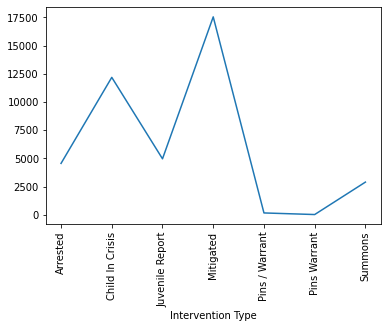

In [29]:
df.groupby(['Intervention Type'])['Force'].count().plot()
plt.xticks(rotation ='vertical')

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, 'QUEENS GATEWAY TO HEALTH SCIENCES SECONDARY SCHOOL(Queens) '),
  Text(0.0, 0, '47 THE AMERICAN SIGN LANGUAGE & ENGLISH SECONDARY SCHOOL(MS)'),
  Text(250.0, 0, 'EDWARD R MURROW HS GED(BS) '),
  Text(500.0, 0, 'IS 61(QN)'),
  Text(750.0, 0, 'Mark Twain IS 239 for the Gifted & Talented(BS)'),
  Text(1000.0, 0, 'PS 139(QN)'),
  Text(1250.0, 0, 'PS 24(Bronx)'),
  Text(1500.0, 0, 'PS 66(Queens)'),
  Text(1750.0, 0, 'THE URBAN ASSEMBLY SCHOOL FOR MEDIA STUDIES(MLK Educational Campus)'),
  Text(2000.0, 0, '')])

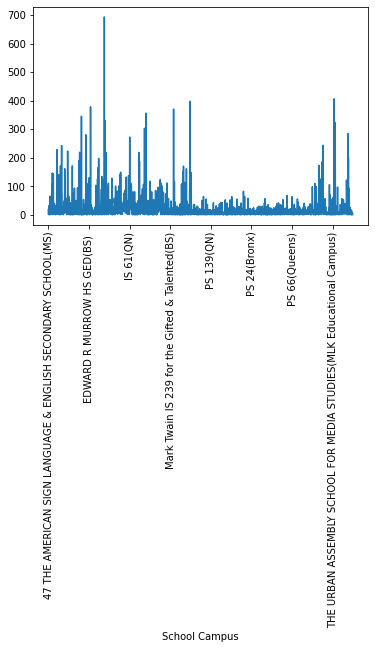

In [30]:
df.groupby(['School Campus'])['Force'].count().plot()
plt.xticks(rotation ='vertical')

In [31]:
df.groupby(['Top Charge'])['Intervention Type'].count()

Top Charge
AGG HARASS                             58  
AGG HARASSMENT                         7   
AGG SEX ABUSE                          3   
AGGR HARASS                            16  
ARSON                                  9   
ASLT/HATE CRM                          2   
ASSAULT                                1720
ASSAULT CHILD                          3   
ATT. MURDER                            2   
BAIL JUMPING                           1   
BURGLARY                               58  
CONSPIRACY                             1   
CPCS                                   147 
CPSP                                   37  
CPW                                    68  
CRIM CONTEMPT                          59  
CRIM MIS/HATE                          1   
CRIM MISCHIEF                          86  
CRIM POS WEAP                          69  
CRIM POS WEAPON                        20  
CRIM POSS WEAP                         18  
CRIM POSS WEAPON                       75  
CRIM SEX ACT         

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Full-Time'),
  Text(1, 0, 'Hand Wand'),
  Text(2, 0, 'Non-Scanning'),
  Text(3, 0, 'Random'),
  Text(4, 0, 'Unannounced')])

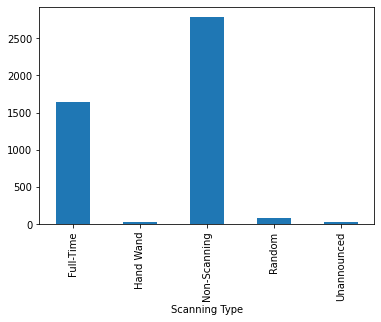

In [32]:
df.groupby(['Scanning Type'])['Top Charge'].count().plot(kind='bar')
plt.xticks(rotation ='vertical')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]),
 [Text(0, 0, 'AGG HARASS'),
  Text(1, 0, 'AGG HARASSMENT'),
  Text(2, 0, 'AGG SEX ABUSE'),
  Text(3, 0, 'AGGR HARASS'),
  Text(4, 0, 'ARSON'),
  Text(5, 0, 'ASLT/HATE CRM'),
  Text(6, 0, 'ASSAULT'),
  Text(7, 0, 'ASSAULT CHILD'),
  Text(8, 0, 'ATT. MURDER'),
  Text(9, 0, 'BAIL JUMPING'),
  Text(10, 0, 'BURGLARY'),
  Text(11, 0

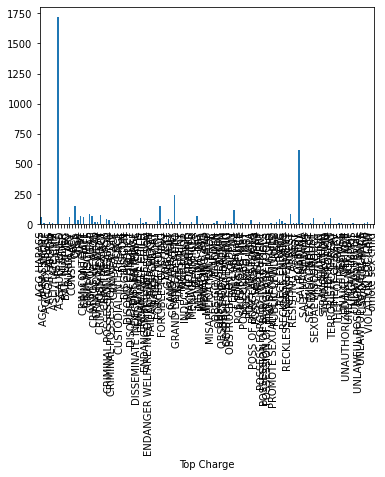

In [33]:
df.groupby(['Top Charge'])['Intervention Type'].count().plot.bar()
plt.xticks(rotation ='vertical')

<AxesSubplot:>

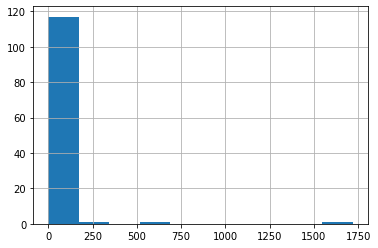

In [34]:
df1 = df.groupby(['Top Charge'])['Intervention Type'].value_counts()

df1.hist()

In [35]:
df['Force'].value_counts()


N    41780
Y    538  
Name: Force, dtype: int64

In [36]:
df.groupby('Force')['School Campus'].value_counts(ascending=False)


Force  School Campus                                                              
N      Grand Street Campus(BN)                                                        676
       THOMAS JEFFERSON HS(Brooklyn)                                                  404
       PORT RICHMOND HS(SI)                                                           390
       EVANDER CHILDS HS(XE)                                                          371
       NEW DORP HS(SI)                                                                369
       JOHN F. KENNEDY HS(XW)                                                         352
       CURTIS HS(SI)                                                                  332
       HARRY S TRUMAN HS(XE)                                                          325
       TOTTENVILLE HS(Staten Island)                                                  322
       JM Rapport School for Career Development(XW)                                   285
       WILLIAM H.

<AxesSubplot:xlabel='Enforcment By,Type Of Force'>

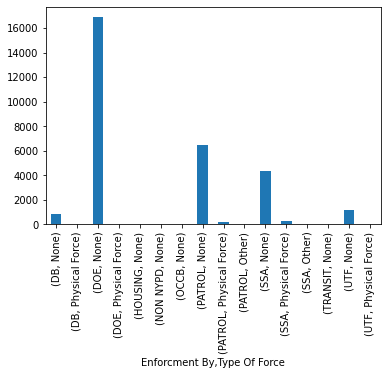

In [37]:
df.groupby('Enforcment By')['Type Of Force'].value_counts(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='Type Of Force,Enforcment By'>

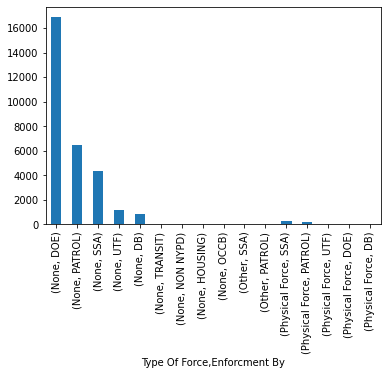

In [38]:
df.groupby('Type Of Force')['Enforcment By'].value_counts(ascending=False).plot(kind='bar')


In [39]:
df.groupby('Type Of Force')['Enforcment By'].value_counts(ascending=False)


Type Of Force   Enforcment By
None            DOE              16882
                PATROL           6504 
                SSA              4332 
                UTF              1127 
                DB               860  
                TRANSIT          46   
                NON NYPD         20   
                HOUSING          16   
                OCCB             3    
Other           SSA              2    
                PATROL           1    
Physical Force  SSA              264  
                PATROL           155  
                UTF              41   
                DOE              10   
                DB               7    
Name: Enforcment By, dtype: int64

In [40]:
force_enforce_cross = pd.crosstab(df['Type Of Force'], df['Enforcment By'])
force_enforce_cross

Enforcment By,DB,DOE,HOUSING,NON NYPD,OCCB,PATROL,SSA,TRANSIT,UTF
Type Of Force,,,,,,,,,
None,860,16882,16,20,3,6504,4332,46,1127
Other,0,0,0,0,0,1,2,0,0
Physical Force,7,10,0,0,0,155,264,0,41


Text(0.5, 1.0, 'Type Of Force vs. Enforcement')

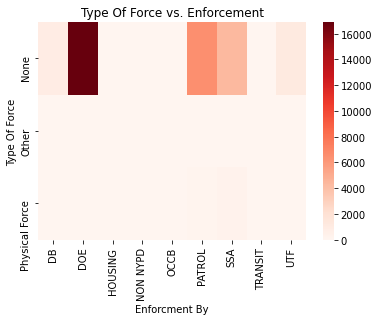

In [41]:
ax = sns.heatmap(force_enforce_cross, cmap="Reds")
ax.set_title("Type Of Force vs. Enforcement")

<AxesSubplot:xlabel='Type Of Force'>

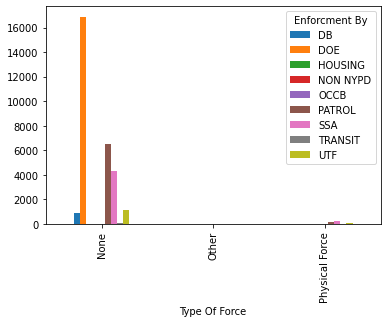

In [42]:
pd.crosstab(df['Type Of Force'], df['Enforcment By']).plot(kind='bar')

# Does the presence of scanning devices help mitigate the type of incidents/offenses that are prevalent on school grounds?


<AxesSubplot:xlabel='Scanning Type'>

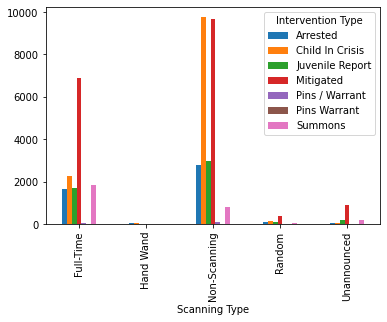

In [43]:
pd.crosstab(df['Scanning Type'], df['Intervention Type']).plot(kind='bar')

<AxesSubplot:xlabel='Intervention Type'>

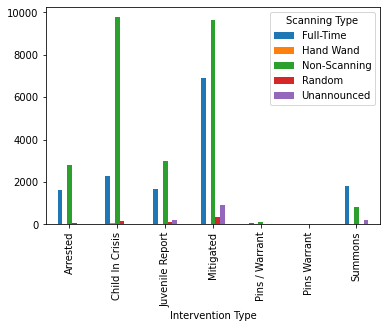

In [44]:
pd.crosstab(df['Intervention Type'], df['Scanning Type']).plot(kind='bar')

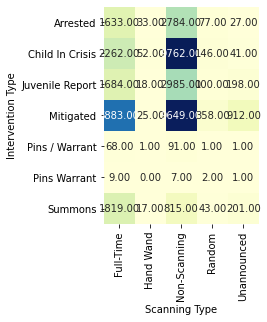

In [105]:
contingency_matrix = pd.crosstab(df['Scanning Type'], df['Intervention Type'])
fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)


plt.show()


(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Arrested'),
  Text(2, 0, 'Child In Crisis'),
  Text(3, 0, 'Juvenile Report'),
  Text(4, 0, 'Mitigated'),
  Text(5, 0, 'Pins / Warrant'),
  Text(6, 0, 'Pins Warrant'),
  Text(7, 0, 'Summons')])

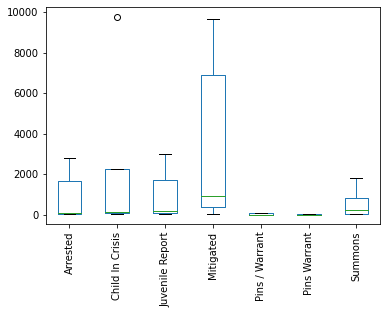

In [87]:
pd.crosstab(df['Scanning Type'], df['Intervention Type']).plot(kind='box')
plt.xticks(rotation ='vertical')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Full-Time'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Hand Wand'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Non-Scanning'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Random'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'Unannounced'),
  Text(4.5, 0, '')])

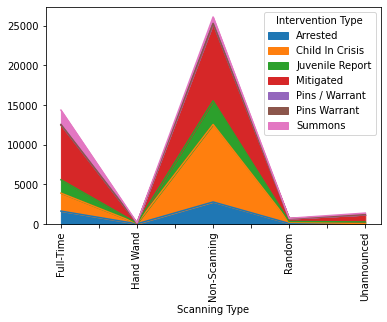

In [93]:
pd.crosstab(df['Scanning Type'], df['Intervention Type']).plot(kind='area')
plt.xticks(rotation ='vertical')

# Type of scanning device has a positive correlation on force


In [50]:
pg.chi2_independence(df, x='Scanning Type', y='Force')

/opt/conda/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/opt/conda/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


(Force                     N           Y
 Scanning Type                          
 Full-Time      14062.903677  181.096323
 Hand Wand      141.181917    1.818083  
 Non-Scanning   25502.588099  328.411901
 Random         707.884157    9.115843  
 Unannounced    1363.442150   17.557850 ,
 Force              N    Y
 Scanning Type            
 Full-Time      13993  251
 Hand Wand      142    1  
 Non-Scanning   25560  271
 Random         708    9  
 Unannounced    1375   6  ,
                  test    lambda       chi2  dof          pval    cramer  \
 0  pearson             1.000000  45.576831  4.0  3.016355e-09  0.032668   
 1  cressie-read        0.666667  45.515751  4.0  3.105902e-09  0.032646   
 2  log-likelihood      0.000000  45.988579  4.0  2.476367e-09  0.032815   
 3  freeman-tukey      -0.500000  46.977992  4.0  1.541096e-09  0.033166   
 4  mod-log-likelihood -1.000000  48.672082  4.0  6.834874e-10  0.033759   
 5  neyman             -2.000000  55.145839  4.0  3.028223e-11  0.

In [51]:
pg.chi2_independence(df, x='Force', y='Scanning Type')

/opt/conda/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/opt/conda/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


(Scanning Type     Full-Time   Hand Wand  Non-Scanning      Random  Unannounced
 Force                                                                         
 N              14062.903677  141.181917  25502.588099  707.884157  1363.44215 
 Y              181.096323    1.818083    328.411901    9.115843    17.55785   ,
 Scanning Type  Full-Time  Hand Wand  Non-Scanning  Random  Unannounced
 Force                                                                 
 N              13993      142        25560         708     1375       
 Y              251        1          271           9       6          ,
                  test    lambda       chi2  dof          pval    cramer  \
 0  pearson             1.000000  45.576831  4.0  3.016355e-09  0.032668   
 1  cressie-read        0.666667  45.515751  4.0  3.105902e-09  0.032646   
 2  log-likelihood      0.000000  45.988579  4.0  2.476367e-09  0.032815   
 3  freeman-tukey      -0.500000  46.977992  4.0  1.541096e-09  0.033166   
 4  mod-lo

# What incidents are force and restraints used in most, scanning or school ?


In [49]:
pd.crosstab(df['Scanning Type'], df['Restraints'])

Restraints,Metal,No Restraints,Velcro,Yes
Scanning Type,,,,
Full-Time,2575,11510,20,253
Hand Wand,51,92,3,0
Non-Scanning,3548,21918,238,389
Random,94,610,2,21
Unannounced,40,1331,0,10


<AxesSubplot:xlabel='Scanning Type'>

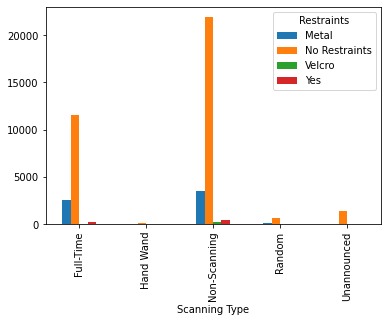

In [48]:
pd.crosstab(df['Scanning Type'], df['Restraints']).plot(kind='bar')

In [47]:
pd.crosstab(df['Restraints'], df['Scanning Type'])

Scanning Type,Full-Time,Hand Wand,Non-Scanning,Random,Unannounced
Restraints,,,,,
Metal,2575,51,3548,94,40
No Restraints,11510,92,21918,610,1331
Velcro,20,3,238,2,0
Yes,253,0,389,21,10


<AxesSubplot:xlabel='Restraints'>

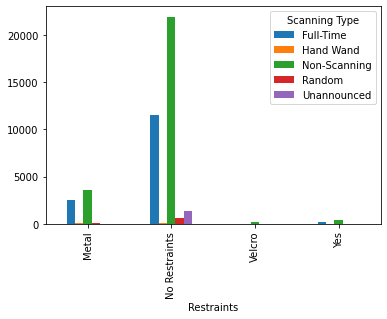

In [46]:
pd.crosstab(df['Restraints'], df['Scanning Type']).plot(kind='bar')

<AxesSubplot:xlabel='Force'>

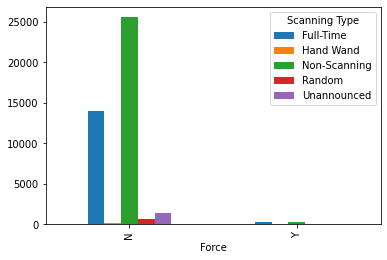

In [45]:
pd.crosstab(df['Force'], df['Scanning Type']).plot(kind='bar')

<AxesSubplot:ylabel='Scanning Type'>

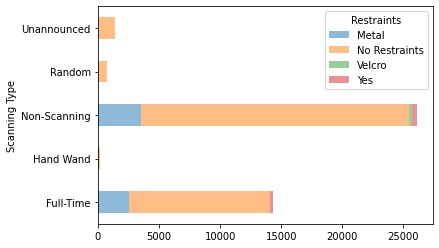

In [78]:
pd.crosstab(df['Scanning Type'], df['Restraints']).plot.barh(stacked=True, alpha=0.5)

<AxesSubplot:ylabel='Scanning Incident'>

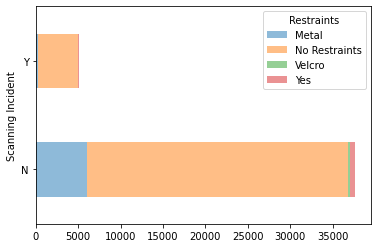

In [100]:
pd.crosstab(df['Scanning Incident'], df['Restraints']).plot.barh(stacked=True, alpha=0.5)

<AxesSubplot:ylabel='Scanning Type'>

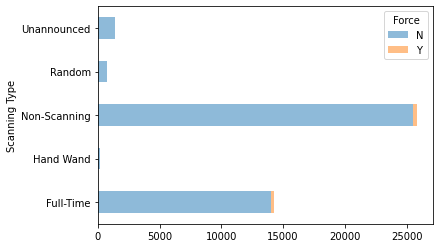

In [94]:
pd.crosstab(df['Scanning Type'], df['Force']).plot.barh(stacked=True, alpha=0.5)

<AxesSubplot:ylabel='Scanning Incident'>

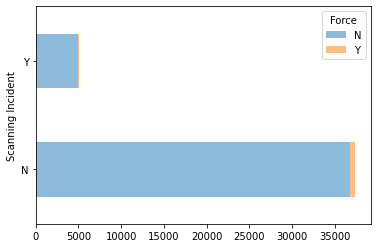

In [99]:
pd.crosstab(df['Scanning Incident'], df['Force']).plot.barh(stacked=True, alpha=0.5)

<AxesSubplot:>

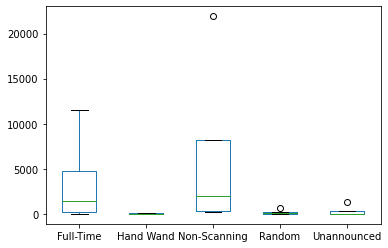

In [98]:
pd.crosstab(df['Restraints'], df['Scanning Type']).plot(kind='box')

<AxesSubplot:>

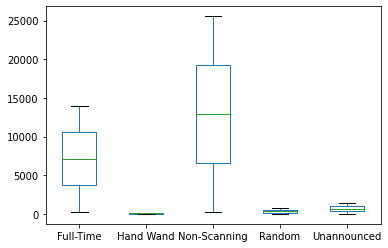

In [97]:
pd.crosstab(df['Force'], df['Scanning Type']).plot(kind='box')

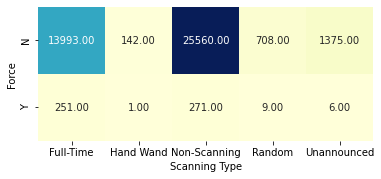

In [68]:
contingency_matrix = pd.crosstab(df['Scanning Type'], df['Force'])
fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)


plt.show()


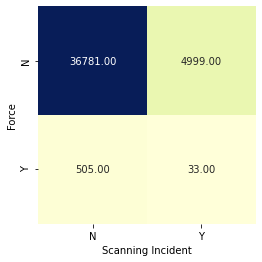

In [101]:
contingency_matrix = pd.crosstab(df['Scanning Incident'], df['Force'])
fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)


plt.show()


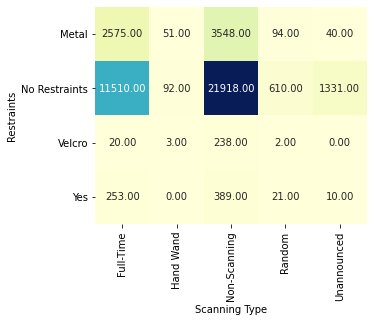

In [102]:
contingency_matrix = pd.crosstab(df['Scanning Type'], df['Restraints'])
fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)


plt.show()


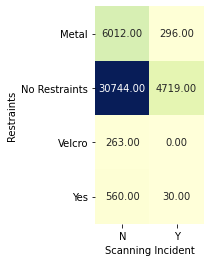

In [104]:
contingency_matrix = pd.crosstab(df['Scanning Incident'], df['Restraints'])
fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)


plt.show()
